In [1]:
import pandas as pd
df = pd.read_excel("MemurlarNetMaas1.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Mezun       200 non-null    int64
 1   Derece      200 non-null    int64
 2   Kademe      200 non-null    int64
 3   HizmetYili  200 non-null    int64
 4   72denKucuk  200 non-null    int64
 5   72denBuyuk  200 non-null    int64
 6   Maas        200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


<AxesSubplot: >

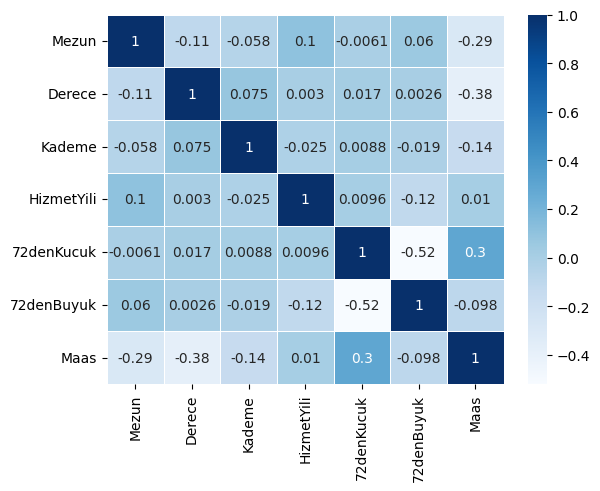

In [2]:
import seaborn as sns
sns.heatmap(df.corr(),linewidths=.6, annot=True, cmap='Blues')

In [3]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
mezun = df.iloc[:,:1]
mezun = OneHotEncoder().fit_transform(mezun)
mezun = pd.DataFrame(mezun.toarray())
mezun

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
endData=pd.concat([mezun,df.iloc[:,1:]],axis=1)
endData.head()

,0,1,2,3,4,5,6,7,Derece,Kademe,HizmetYili,72denKucuk,72denBuyuk,Maas
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,2,10,0,3,11302
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,13,3,0,11314
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,8,1,2,12298
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,11,1,0,10907
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,2,1,12333


In [5]:
import statsmodels.api as sm
import numpy as np

X_1 = endData.iloc[:,:-1]
X_1 = np.array(X_1,dtype=float)

model = sm.OLS(endData.iloc[:,-1:],X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Maas   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     632.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.50e-144
Time:                        11:42:26   Log-Likelihood:                -1211.7
No. Observations:                 200   AIC:                             2449.
Df Residuals:                     187   BIC:                             2492.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.144e+04     39.758    287.752      0.000    1.14e+04    1.15e+04
x2          1.261e+04     37.770    333.956      0.000    1.25e+04    1.27e+04
x3          1.253e+04     39.195    319.773      0.000    1.25e+04    1.26e+04
x4          1.105e+04     37.286    296.290      0.000     1.1e+04    1.11e+04
x5          1.199e+04     41.188    291.138      0.000    1.19e+04    1.21e+04
x6          1.187e+04     39.419    301.243      0.000    1.18e+04     1.2e+04
x7          1.129e+04     39.347    286.934      0.000    1.12e+04    1.14e+04
x8          1.114e+04     41.012    271.683      0.000    1.11e+04    1.12e+04
x9          -154.2368      4.463    -34.555      0.000    -163.042    -145.432
x10           -3.0457      9.763     -0.312      0.755     -22.305      16.214
x11            4.4969      1.079      4.167      0.000       2.368       6.626
x12          194.8520      9.199     21.183      0.000     176.705     212.999
x13           96.7547      9.081     10.654      0.000      78.839     114.670
==============================================================================
Omnibus:                        2.974   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.027
Skew:                           0.273   Prob(JB):                        0.220
Kurtosis:                       2.743   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
for i in range(13):
    print(model.pvalues[i])

1.7990315816053476e-249
1.530909952535816e-261
5.052695897318766e-258
7.684854887996388e-252
2.0277587139705195e-250
3.4833646828090125e-253
3.060476261273863e-249
8.140406531492199e-245
4.017201888279098e-83
0.7554116721192063
4.718513999683005e-05
1.4227120204477628e-51
5.135809640965019e-21


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split
def get_model(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    
    #LinearReg
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
    print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
    
    #Poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train.values)
    X_test_poly = poly.transform(X_test.values)
    lm_poly = LinearRegression()
    
    lm_poly.fit(X_train_poly, y_train)
    print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
    print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(endData.iloc[:,:-1],endData.iloc[:,-1],test_size=.33,random_state=0)

In [9]:
get_model(endData.iloc[:,:-1],endData.iloc[:,-1:])

Linear Regression train R^2: 0.975
Linear Regression test R^2: 0.975
Degree 2 polynomial regression train R^2: 0.953
Degree 2 polynomial regression test R^2: 0.912


c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()

lr.fit(X_train,y_train)

c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [11]:
y_pred_sklearn = lr.predict(X_test)

c:\Users\MTG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [12]:
comp = pd.DataFrame({"Real":y_test,"Predict":y_pred_sklearn}).sort_index()

comp["comp_errors"] = comp.Real-comp.Predict

print(np.average(comp.comp_errors),np.max(comp.comp_errors),np.min(comp.comp_errors))

-4.435027766612235 253.54304521735503 -222.78031669525262


In [13]:
print("coefficients",lr.coef_)
print("intercept",lr.intercept_)
print("r2 Score",metrics.r2_score(y_test,y_pred_sklearn))
print("mse",metrics.mean_squared_error(y_test,y_pred_sklearn))
print("rmse",metrics.mean_squared_error(y_test,y_pred_sklearn,squared=False))

coefficients [-287.45248056  887.27908558  767.33402499 -700.45045176  258.84057536
  111.34858517 -453.04841406 -583.85092472 -158.43867265   -4.3872177
    4.07413037  181.9765918    92.02360398]
intercept 11784.276385178273
r2 Score 0.9737968136029141
mse 11378.54007448631
rmse 106.67023987263885


In [14]:
import pandas as pd
x=[[0,0,0,0,0,0,1,0,5,3,0,0,0]]
x=pd.DataFrame(x)
x.shape
lr.predict(x)

array([10525.87295478])

Text(0, 0.5, 'Tahmin Değerleri')

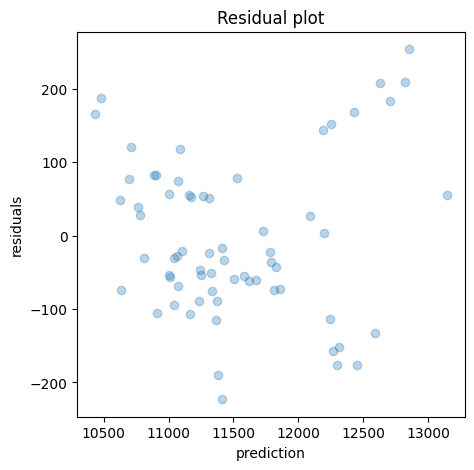

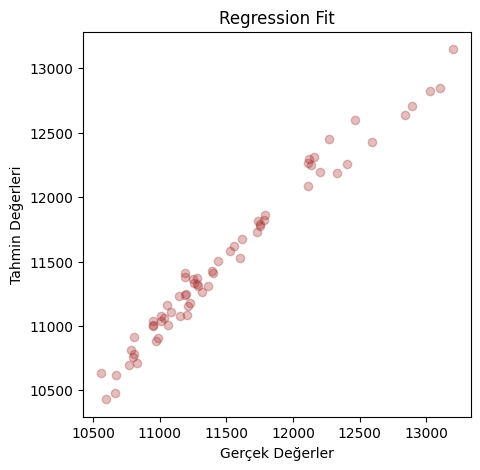

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=[17,5])
plt.subplot(1, 3, 2)
res = y_test - y_pred_sklearn
plt.scatter(y_pred_sklearn, res, alpha=.3)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

plt.figure(figsize=[17,5])
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_sklearn, alpha=.3, c='brown')
plt.title("Regression Fit")
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
y_pred_poly_sklearn = lm_poly.predict(X_test_poly)

In [19]:
comp = pd.DataFrame({"Real":y_test,"Predict":y_pred_poly_sklearn}).sort_index()

comp["comp_errors"] = comp.Real-comp.Predict

print(np.average(comp.comp_errors),np.max(comp.comp_errors),np.min(comp.comp_errors))

4.381451231060606 247.8203125 -343.78125


In [20]:
print("coefficients",lm_poly.coef_)
print("intercept",lm_poly.intercept_)
print("r2 Score",metrics.r2_score(y_test,y_pred_poly_sklearn))
print("mse",metrics.mean_squared_error(y_test,y_pred_poly_sklearn))
print("rmse",metrics.mean_squared_error(y_test,y_pred_poly_sklearn,squared=False))

coefficients [ 3.01101049e+13 -2.35508770e+02  5.03782042e+02  6.56701875e+02
 -4.19820892e+02  4.44023058e+01  1.72123998e+02 -3.22964016e+02
 -3.98716542e+02 -2.37180918e+02 -1.32846246e+01  1.74973216e+00
  1.57622680e+02  9.26872078e+01 -2.35508770e+02  4.26325641e-13
 -1.32160949e-12  2.94164693e-12  2.55795385e-13 -2.18847163e-12
 -2.84217094e-14  5.68434189e-13  1.02531558e+00  6.08852781e+01
 -2.99710691e+00 -1.13404726e+01 -1.57041901e+01  5.03782042e+02
  2.20268248e-13 -5.11590770e-13 -1.13686838e-13  5.68434189e-14
  2.84217094e-13 -1.56319402e-13 -7.06781353e+01  4.58686090e+01
 -2.60502911e+00 -7.69321535e+00  2.76355732e+01  6.56701875e+02
 -1.77635684e-13 -2.84217094e-14  2.18491891e-13 -1.13686838e-13
  5.68434189e-14 -8.20012006e+01 -1.23984952e+02 -6.93323918e+00
  1.45766370e-01 -5.89474066e+00 -4.19820892e+02 -1.13686838e-13
 -5.68434189e-14  2.84217094e-14 -1.13686838e-13  3.99665670e+00
  7.28395450e+00 -1.33621728e+00  4.95979379e+01  3.88288553e-01
  4.44023058

In [23]:
import pandas as pd
x=[[0,0,0,0,0,0,1,0,5,3,0,0,0]]
x=pd.DataFrame(x)
x=poly.transform(x) 
x.shape
lm_poly.predict(x)

array([10402.40234375])

Text(0, 0.5, 'Tahmin Değerleri')

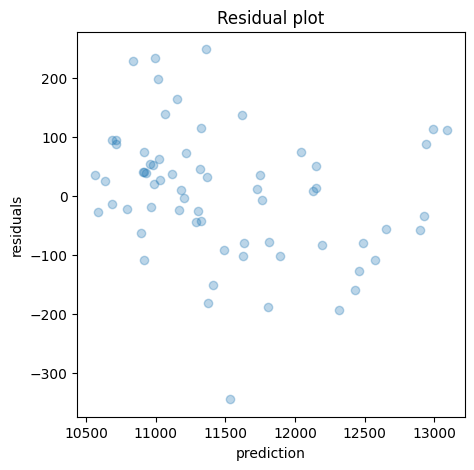

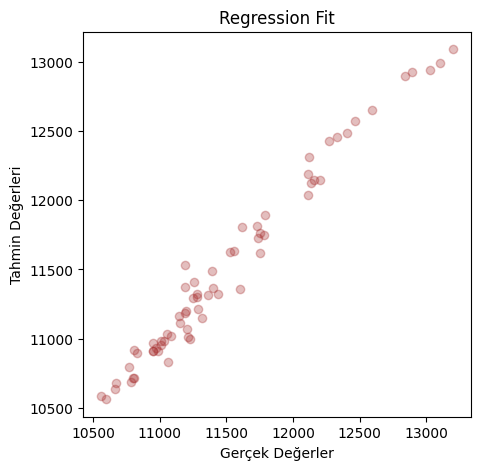

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=[17,5])
plt.subplot(1, 3, 2)
res = y_test - y_pred_poly_sklearn
plt.scatter(y_pred_poly_sklearn, res, alpha=.3)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

plt.figure(figsize=[17,5])
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_poly_sklearn, alpha=.3, c='brown')
plt.title("Regression Fit")
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')